# auto-tresholding

This snotebook hows a few examples on automated tresholding

In [1]:
# set up autoreload on all files
#%load_ext autoreload
#%autoreload 2


# 1. tresholding by iterative outlier detection
The data is treated as a randomly distributed collection of pixel values. As a first estimate, mean and standard deviations are obtained. Next, all pixels beyond a pre-set number of times this standard deviations ('the sigmas') are discarded (these can be the ones above the mean, below or on both sides). After discarding, the reamining pixel values are used for the second estimate of mean and standard deviation (the latter will be smaller). This sequence is repeated until the change in value of the standard deviation drops below a user-set percentage. For a standard-normal distribution with outliers, the end estimate will approach mean and sigma. These can subsequently be used for a treshold to find objects rising sufficiently above the noise in the background. We try it on 1D data, containing samples from two distributions:

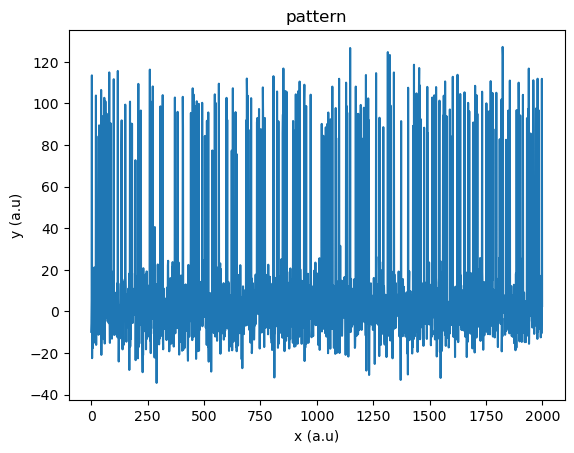

In [2]:
from jacob_tools import random_data_twopeaks
random_data_twopeaks(demo=1)
trace_data=random_data_twopeaks(demo=0) 

c:\Users\jkerssemakers\Dropbox\ChJ_recent\ChJ25_Ivo\2025_intro_papylio\papylio\miscellaneous\jacob_tools.py:111: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


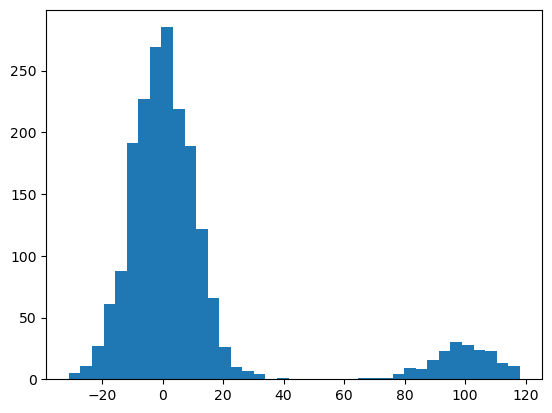

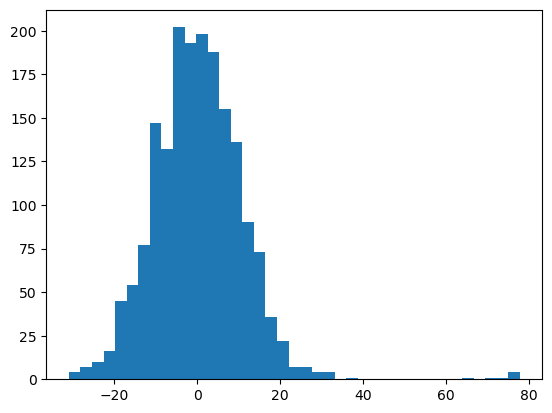

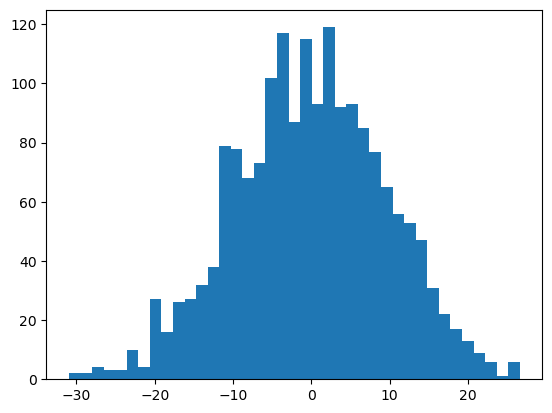

In [3]:
from jacob_tools import outlier_flag
outlier_flag(trace_data, tolerance=2.5, sig_change=0.7, how=1,demo=1)


The above example shows how the outliers are pinched off. This method works best if the majority of pixels is background. The settings of tolerance and sigmas need to be experiment-tuned but tend to be robust after that.

# 2. tresholding by 'triangulation'
All pixels are sorted by brightness. The lower half of all pixels is fitted with a line. The upper half in brightness is also fitted. The two lines have one crossing point. Now, the'knee', being the [index,value] point closest to this crossing point, is taken as the treshold.
Rationale of the method: Note that this way, pixel index and pixel brightness are treated as equal parameters. For many microscope images, there are lots of dark pixels (representing the lower part of the curve) and less but much brighter ones (that we associate with true objects). This tresholding tends to return an intuitive boundary between these two types of pixels. It works best when both types of signal (dark and bright pixels) are sufficiently present with the majority still being dark: this can be both cropped spot immages as full-FOV. We apply it to an artificial image of a noisy spot:

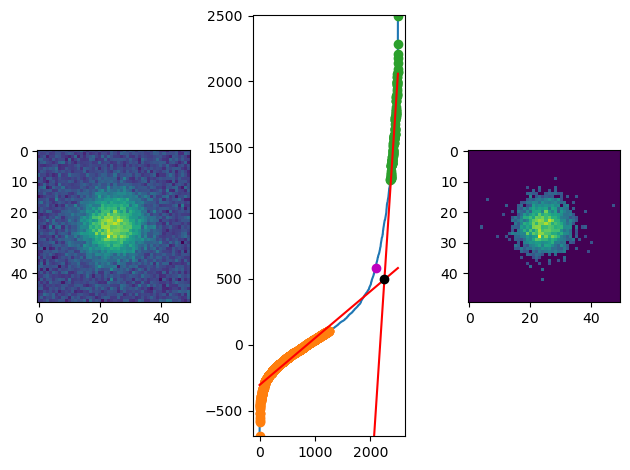

In [4]:
from jacob_tools import generate_spot
from jacob_tools import sorted_pixels_treshold
spot_im=generate_spot(demo=0)
fig,ax=sorted_pixels_treshold(spot_im, demo=1)

# remark
These treshold methods do not take into account spatial information: every pixel value could come from everywhere. Therefore, when applied to images, object edges are still somewhat fragmented. The usual fix is to first pre-smooth the image data with, say, one or a few times the point spread function (PSF) of the microscope. Since the methods are self-scaling, the tresholding will return a similar  but less noisy boundary.